In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet('data/fhvhv_tripdata_2019-02.parquet')

In [3]:
#df.info(verbose=True)

### Here is the output of df.info(verbose=True) with some notes:
<class 'pandas.core.frame.DataFrame'>  
RangeIndex: 20159102 entries, 0 to 20159101  
Data columns (total 24 columns): 

    Column                Dtype         

 0   hvfhs_license_num     object      
    • HV0002: Juno  
    • HV0003: Uber  
    • HV0004: Via  
    • HV0005: Lyft  

 1   dispatching_base_num  object   
 
 2   originating_base_num  object    
     there are multiple bases per company
     
 3   request_datetime      datetime64\[ns\]  
 4   on_scene_datetime     datetime64\[ns\]  
 5   pickup_datetime       datetime64\[ns\]  
 6   dropoff_datetime      datetime64\[ns\]  
 
 7   PULocationID          int64         
 8   DOLocationID          int64         
     Pick-Up and Drop-Off TLC taxi zone
     
 9   trip_miles            float64     
 
 10  trip_time             int64         
     total time in second
     
 11  base_passenger_fare   float64       
     Base passenger fare before tolls, tips, taxes, and fees.
     
 12  tolls                 float64       
     Total amount of all tolls paid in trip
     
 13  bcf                   float64       
     Total amount collected in trip for Black Car Fund.
     
 14  sales_tax             float64       
     Total amount collected in trip for NYS sales tax.
     
 15  congestion_surcharge  float64       
     Total amount collected in trip for NYS congestion surcharge.
     
 16  airport_fee           float64       
     $2.50 for both drop off and pick up at LaGuardia, Newark, and John F. Kennedy airports.
     
 17  tips                  float64       
     Total amount of tips received from passenger.
     
 18  driver_pay            float64       
     Total driver pay (not including tolls or tips and net of commission, surcharges, or taxes).
     
 19  shared_request_flag   object       
     Did the passenger agree to a shared/pooled ride, regardless of whether they were matched? (Y/N)
     
 20  shared_match_flag     object        
     Did the passenger share the vehicle with another passenger who booked separately at any point during the trip? (Y/N)

 21  access_a_ride_flag    object        
     Was the trip administered on behalf of the Metropolitan Transportation Authority (MTA)? (Y/N)
     
 22  wav_request_flag      object        
     Did the passenger request a wheelchair-accessible vehicle (WAV)? (Y/N)
     
 23  wav_match_flag        float64       
     Did the trip occur in a wheelchair-accessible vehicle (WAV)? (Y/N)
     
dtypes: datetime64\[ns\]\(4\), float64\(10\), int64\(3\), object\(7\)

memory usage: 3.6+ GB


In [4]:
#pd.options.display.max_columns = None
#df.head

### Here is the output of df.head formatted in Markdown:
bound method NDFrame.head of          
|row|hvfhs_license_num |dispatching_base_num |originating_base_num  |
|:------------------:|:-------------------:|:-------------------:|:-------:|
|0                   |HV0003               |B02867               |B02867   |
|1                   |HV0003               |B02879               |B02879   |
|2                   |HV0005               |B02510               |  None   |
|3                   |HV0005               |B02510               |  None   |
|4                   |HV0005               |B02510               |  None   |
|...                 |   ...               |   ...               |   ...   |
|20159097            |HV0005               |B02510               |  None   |
|20159098            |HV0003               |B02395               |B02395   |
|20159099            |HV0003               |B02395               |B02395   |
|20159100            |HV0003               |B02395               |B02395   |
|20159101            |HV0003               |B02395               |B02395   |

|row|request_datetime |on_scene_datetime |pickup_datetime  |
|:-------:|:------------------:|:------------------:|:--------------------:|
|0        |2019-02-01 00:01:26 |2019-02-01 00:02:55 |2019-02-01 00:05:18   |
|1        |2019-02-01 00:26:08 |2019-02-01 00:41:29 |2019-02-01 00:41:29   |
|2        |2019-02-01 00:48:58 |                NaT |2019-02-01 00:51:34   |
|3        |2019-02-01 00:02:15 |                NaT |2019-02-01 00:03:51   |
|4        |2019-02-01 00:06:17 |                NaT |2019-02-01 00:09:44   |
|...      |                ... |                ... |                ...   |
|20159097 |2019-02-28 23:18:35 |                NaT |2019-02-28 23:23:40   |
|20159098 |2019-02-28 23:04:43 |2019-02-28 23:08:45 |2019-02-28 23:10:43   |
|20159099 |2019-02-28 23:06:47 |2019-02-28 23:12:45 |2019-02-28 23:13:47   |
|20159100 |2019-02-28 23:33:24 |2019-02-28 23:37:53 |2019-02-28 23:40:31   |
|20159101 |2019-02-28 23:39:20 |2019-02-28 23:46:33 |2019-02-28 23:48:03   |


|row|dropoff_datetime |PULocationID |DOLocationID  |trip_miles|
|:-------:|:----------------------------:|:------------:|:--------:|:------:|
|0        |2019-02-01 00:14:57           |245           |251       | 2.45   |
|1        |2019-02-01 00:49:39           |216           |197       | 1.71   |
|2        |2019-02-01 01:28:29           |261           |234       | 5.01   |
|3        |2019-02-01 00:07:16           | 87           | 87       | 0.34   |
|4        |2019-02-01 00:39:56           | 87           |198       | 6.84   |
|...      |                ...           |...           |...       |  ...   |
|20159097 |2019-03-01 00:01:32           |181           |239       | 9.64   |
|20159098 |2019-03-01 00:01:08           |244           |225       |15.59   |
|20159099 |2019-02-28 23:31:21           |244           |  7       | 6.29   |
|20159100 |2019-03-01 00:15:56           |260           | 61       | 7.85   |
|20159101 |2019-03-01 00:12:28           |226           | 61       | 5.52   |

|row|trip_time |base_passenger_fare |tolls  |bcf|sales_tax|
|:-------------:|:------------------:|:------:|:----:|:---------:|:-----:|
|0              | 579                | 9.35   |0.00  |0.23       |0.83   |  
|1              | 490                | 7.91   |0.00  |0.20       |0.70   |  
|2              |2159                |44.96   |0.00  |1.12       |3.99   |  
|3              | 179                | 7.19   |0.00  |0.18       |0.64   |
|4              |1799                |24.25   |0.11  |0.61       |2.16   |
|...            | ...                |  ...   | ...  | ...       | ...   |
|20159097       |2220                |40.33   |2.90  |1.08       |3.84   |
|20159098       |3026                |27.64   |2.88  |0.00       |0.00   |
|20159099       |1053                | 6.28   |2.88  |0.00       |0.00   |
|20159100       |2125                |25.61   |0.00  |0.00       |0.00   |
|20159101       |1466                |15.36   |0.00  |0.00       |0.00   |

|row|congestion_surcharge |airport_fee |tips  |driver_pay|
|:-----------------------:|:-------------:|:----:|:--------:|:------:|
|0                        | 0.00          |NaN   |0.0       | 7.48   |
|1                        | 0.00          |NaN   |2.0       | 7.93   |
|2                        | 0.00          |NaN   |0.0       |35.97   |
|3                        | 0.00          |NaN   |3.0       | 5.39   |
|4                        | 0.00          |NaN   |4.0       |17.07   |
|...                      |  ...          |...   |...       |  ...   |
|20159097                 | 2.75          |NaN   |0.0       |29.30   |
|20159098                 | 0.00          |NaN   |0.0       |27.51   |
|20159099                 | 0.00          |NaN   |0.0       |11.43   |
|20159100                 | 0.00          |NaN   |0.0       |13.29   |
|20159101                 | 0.00          |NaN   |0.0       | 8.14   |

|row|shared_request_flag |shared_match_flag |access_a_ride_flag  |
|:------------------:|:-------------------:|:------------------:|:-----:|
|0                   |       Y             |    N               |   N   |
|1                   |       N             |    N               |   N   |
|2                   |       N             |    Y               |   N   |
|3                   |       N             |    Y               |   N   |
|4                   |       N             |    Y               |   N   |
|...                 |     ...             |  ...               | ...   |
|20159097            |       N             |    N               |   N   |
|20159098            |       Y             |    Y               |   N   |
|20159099            |       Y             |    Y               |   N   |
|20159100            |       Y             |    Y               |   N   |
|20159101            |       Y             |    Y               |   N   |

|row|wav_request_flag |wav_match_flag |
|:------------------:|:-------------:|:------:|
|0                   |    N          |   NaN  |
|1                   |    N          |   NaN  |
|2                   |    N          |   NaN  |
|3                   |    N          |   NaN  |
|4                   |    N          |   NaN  |
|...                 |  ...          |   ...  |
|20159097            |    N          |   NaN  |
|20159098            |    N          |   NaN  |
|20159099            |    N          |   NaN  |
|20159100            |    N          |   NaN  |
|20159101            |    N          |   NaN  |

\[20159102 rows x 24 columns\]

In [5]:
#df.nunique()

### number of unique values in each column
    
|column|nunique|
|:--------------------:|:---------:|
|hvfhs_license_num     |        4|
|dispatching_base_num  |       33|
|originating_base_num  |       33|
|request_datetime      |  2367057|
|on_scene_datetime     |  2306904|
|pickup_datetime       |  2366240|
|dropoff_datetime      |  2366900|
|PULocationID          |      263|
|DOLocationID          |      263|
|trip_miles            |    10548|
|trip_time             |    10472|
|base_passenger_fare   |    27299|
|tolls                 |     4038|
|bcf                   |     1405|
|sales_tax             |     3055|
|congestion_surcharge  |        3|
|airport_fee           |        0|
|tips                  |     4348|
|driver_pay            |    21625|
|shared_request_flag   |        2|
|shared_match_flag     |        2|
|access_a_ride_flag    |        1|
|wav_request_flag      |        2|
|wav_match_flag        |        0|

In [6]:
#df.isnull().sum()

### number of null values in each column
|column|nisnull|
|:-------------------:|:---------:|
|hvfhs_license_num    |          0|
|dispatching_base_num |        405|
|originating_base_num |    5675188|
|request_datetime     |     108898|
|on_scene_datetime    |    6654049|
|pickup_datetime      |          0|
|dropoff_datetime     |          0|
|PULocationID         |          0|
|DOLocationID         |          0|
|trip_miles           |          0|
|trip_time            |          0|
|base_passenger_fare  |          0|
|tolls                |          0|
|bcf                  |          0|
|sales_tax            |          0|
|congestion_surcharge |     513041|
|airport_fee          |   20159102|
|tips                 |          0|
|driver_pay           |          0|
|shared_request_flag  |          0|
|shared_match_flag    |          0|
|access_a_ride_flag   |          0|
|wav_request_flag     |          0|
|wav_match_flag       |   20159102|

## What I learned from the first looks at the data:

'originating_base_num' seems to contain the same value as 'dispatching_base_num' but has a lot more nulls.  
Let's try to fill missing values from these two and drop one.

Some 'request_datetime' is missing. Let's fill in with the mean time difference between it and 'pickup_datetime'.

A third of 'on_scene_datetime' is missing. Let's fill in with the mean time difference between it and 'pickup_datetime'.

Something I don't understand is why sometimes 'shared_request_flag' is 'N' but 'shared_match_flag' is 'Y'.  
Does the service force the user to be on a shared ride? **I might combine these two columns with OR.**

'access_a_ride_flag' is all 'N' in this dataset. 'wav_match_flag' is all 'NaN' in this dataset. Drop these.

**Let's try to predict the base passenger fare (without other added costs)**.  
So let's drop \['tolls','bcf','sales_tax','congestion_surcharge','airport_fee','tips','driver_pay'\].

Real-valued features are the easiest to handle by both linear and tree-based models.  
There are two such columns: **\['trip_miles','trip_time'\]**.  
**hvfhs_license_num** is a categorical feature with 4 classes. Manageable.  
Let's train using only these three features in the first pass.  





In [7]:
# use wellkown labels for license num
df['hvfhs_license_num'] = df['hvfhs_license_num'].map(
    {'HV0002':'Juno' ,'HV0003':'Uber', 'HV0004':'Via', 'HV0005':'Lyft'})

# combine two base_num columns
srs1 = df['dispatching_base_num'].copy()
srs2 = df['originating_base_num'].copy()
# fill null in one column with the other column
srs1[srs1.isnull()]=srs2[srs1.isnull()]
# save one back to df
df = df.assign(starting_base_num=srs1)

# fill request_datetime
tdiff = df['pickup_datetime'] - df['request_datetime']
df.loc[df['request_datetime'].isnull(), 'request_datetime'] = \
df['pickup_datetime'][df['request_datetime'].isnull()] - tdiff.mean()

# fill on_scene_datetime
tdiff = df['pickup_datetime'] - df['on_scene_datetime']
df.loc[df['on_scene_datetime'].isnull(), 'on_scene_datetime'] = \
df['pickup_datetime'][df['on_scene_datetime'].isnull()] - tdiff.mean()

# combine two flags about shared rides
srs1 = df['shared_request_flag'].map({'Y':True ,'N':False})
srs2 = df['shared_match_flag'].map({'Y':True ,'N':False})
srs3 = srs1 | srs2
df = df.assign(shared_flag_or=srs3)

# turn Y/N into actual binary values
df['wav_request_flag'] = df['wav_request_flag'].map({'Y':True ,'N':False})

# drop extra columns
df = df.drop(columns=['dispatching_base_num','originating_base_num','tolls','bcf','sales_tax',
                            'congestion_surcharge','airport_fee','tips','driver_pay',
                            'shared_request_flag','shared_match_flag','access_a_ride_flag','wav_match_flag'])


In [8]:
df.head

<bound method NDFrame.head of          hvfhs_license_num    request_datetime             on_scene_datetime  \
0                     Uber 2019-02-01 00:01:26 2019-02-01 00:02:55.000000000   
1                     Uber 2019-02-01 00:26:08 2019-02-01 00:41:29.000000000   
2                     Lyft 2019-02-01 00:48:58 2019-02-01 00:49:15.501047221   
3                     Lyft 2019-02-01 00:02:15 2019-02-01 00:01:32.501047221   
4                     Lyft 2019-02-01 00:06:17 2019-02-01 00:07:25.501047221   
...                    ...                 ...                           ...   
20159097              Lyft 2019-02-28 23:18:35 2019-02-28 23:21:21.501047221   
20159098              Uber 2019-02-28 23:04:43 2019-02-28 23:08:45.000000000   
20159099              Uber 2019-02-28 23:06:47 2019-02-28 23:12:45.000000000   
20159100              Uber 2019-02-28 23:33:24 2019-02-28 23:37:53.000000000   
20159101              Uber 2019-02-28 23:39:20 2019-02-28 23:46:33.000000000   

         

In [9]:
df.isnull().sum()

hvfhs_license_num        0
request_datetime         0
on_scene_datetime        0
pickup_datetime          0
dropoff_datetime         0
PULocationID             0
DOLocationID             0
trip_miles               0
trip_time                0
base_passenger_fare      0
wav_request_flag         0
starting_base_num      405
shared_flag_or           0
dtype: int64

## visually check data

We pared down the columns and fill in (most) null values. Now let's check the distribution of the data.

In [10]:
%matplotlib inline

hvfhs_license_num
Uber    13504994
Lyft     4690916
Via       983926
Juno      979266
Name: count, dtype: int64

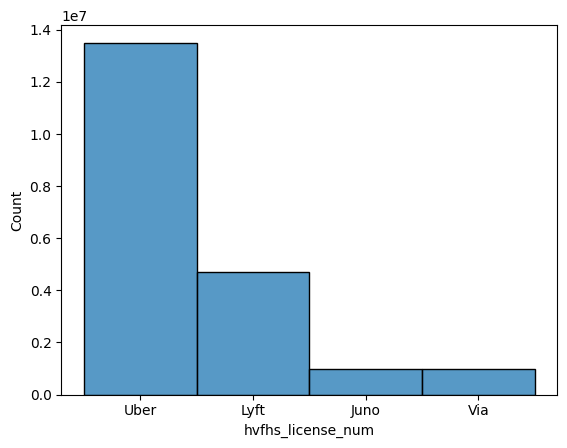

In [11]:
#we might have unbalanced data: very few rides by Juno?
sns.histplot(df['hvfhs_license_num'])
df['hvfhs_license_num'].value_counts()

Juno and Via have a fraction of the number of rides compared to Uber and Lyft but is definitely enough for data splitting.

<Axes: xlabel='request_datetime', ylabel='Count'>

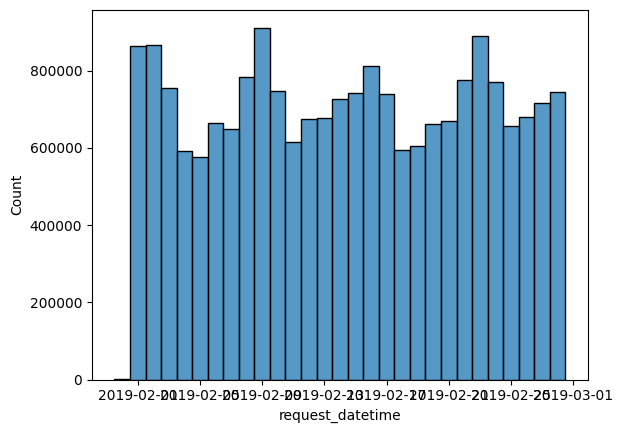

In [12]:
sns.histplot(df['request_datetime'].dt.date)   # bins by day


(Feb. 2019 starts on a Friday and ends on a Thursday.) The number of rides are higher on weekends than weekdays. I might make a feature that captures that.

<Axes: xlabel='request_datetime', ylabel='Count'>

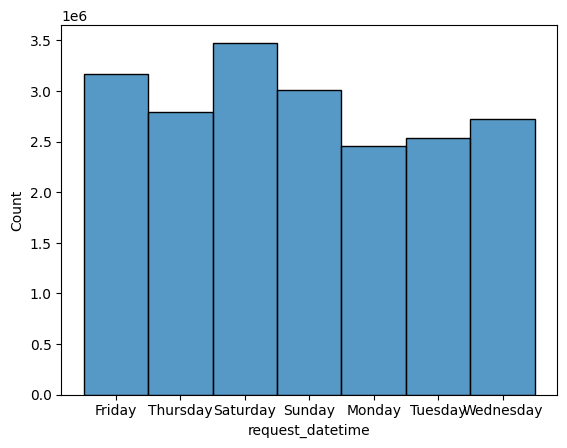

In [13]:
sns.histplot(df['request_datetime'].dt.day_name())

<Axes: xlabel='request_datetime', ylabel='Count'>

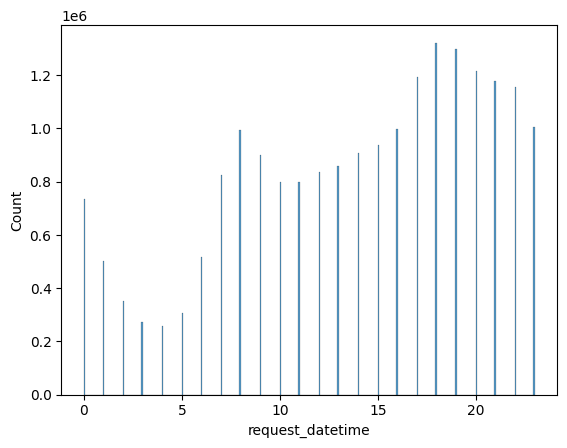

In [14]:
sns.histplot(df['request_datetime'].dt.hour)


The number of rides depend on hour of the day. I can make this a new feature.

<Axes: xlabel='PULocationID', ylabel='Count'>

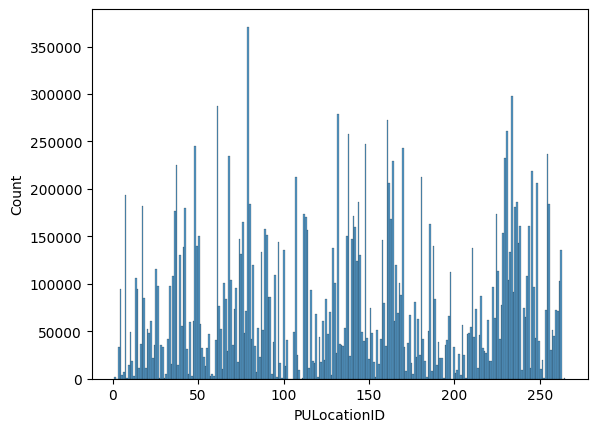

In [15]:
sns.histplot(df['PULocationID'])

<Axes: xlabel='DOLocationID', ylabel='Count'>

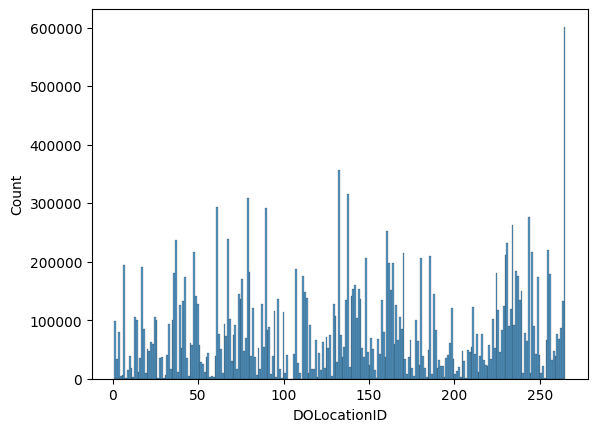

In [16]:
sns.histplot(df['DOLocationID'])

(-1.0, 50.0)

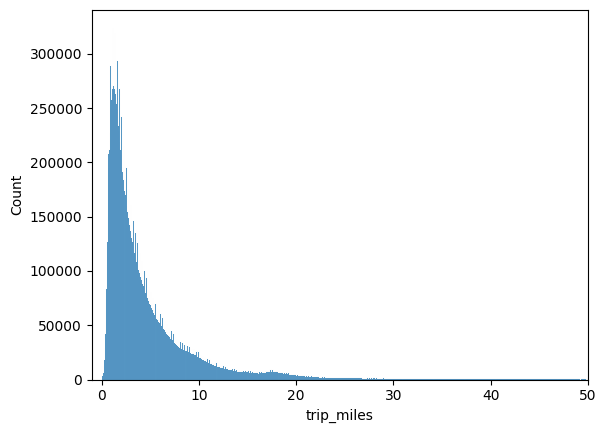

In [17]:
ax = sns.histplot(df['trip_miles'])
ax.set_xlim(-1, 50)

Maximum value of 'trip_miles' is 469.26 while the median is 2.88. The distribution is right-skewed. Let's do log1p. 'trip_time' has the same problem.

<Axes: xlabel='trip_miles', ylabel='Count'>

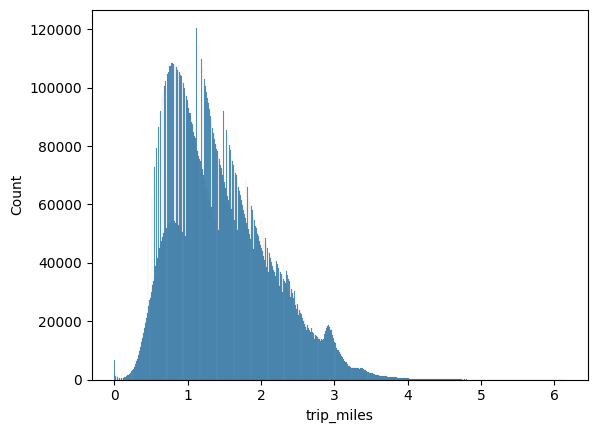

In [18]:
sns.histplot(np.log1p(df['trip_miles']))

<Axes: xlabel='trip_time', ylabel='Count'>

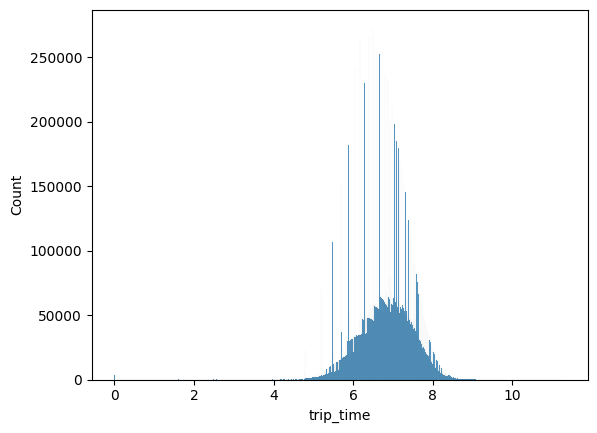

In [19]:
sns.histplot(np.log1p(df['trip_time']))

<Axes: xlabel='base_passenger_fare', ylabel='Count'>

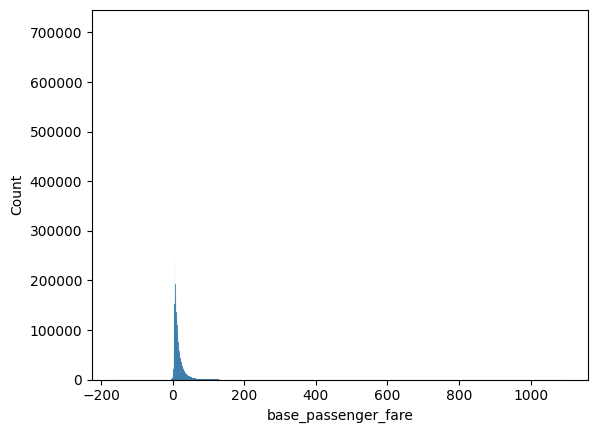

In [20]:
sns.histplot(df['base_passenger_fare'])


In [21]:
pd.set_option("display.float_format", lambda x: f"{x:.3f}")
df['base_passenger_fare'].describe()

count   20159102.000
mean          15.708
std           16.126
min         -163.280
25%            6.690
50%           10.740
75%           18.980
max         1097.290
Name: base_passenger_fare, dtype: float64

In [22]:
(df['base_passenger_fare']<0).sum()

np.int64(75034)

Some (<1%) of prices are negative. Even though only a small part of data is impacted, it reflects a something that we don't understand in the price setting process or data corruption. And it prevents us from applying a log transform. 

In [23]:
# apply log transform to right-skewed data
df= df.assign(trip_miles_log1p=np.log1p(df['trip_miles']))
df= df.assign(trip_time_log1p=np.log1p(df['trip_time']))

# engineer new features
# day of the week
df = df.assign(day_of_week=df['request_datetime'].dt.day_name())
# hour of the day
df = df.assign(hour_of_day=df['request_datetime'].dt.hour)
df["hour_of_day"] = df["hour_of_day"].astype(str)

# demand of the ride
# the idea is, with fixed supply, demand drive up price
# with the same distance, a ride to the airport might be more expensive 
# a ride from the venue after a concert is probably more expensive than other times
# but I haven't figured out how to estimate this that 
# 1. does not cause data leaking
# and 2. works for a single test datapoint with no context
# So I won't include it for this project

# I realize that datetime cannot be treated as a numeric variable
# we can instead use the ride wait time = pickup_datetime - request_datetime
# which is a good numeric variable
# and captures supply-demand
# the only problem is that in real life, price is fixed before the wait time realizes
# but I'm sure the ride share companies have a way to estimate the wait time and feed it to price prediction
# of course it also needs to be log transformed
df = df.assign(wait_time_sec_log1p=np.log1p((df['pickup_datetime']-df['request_datetime']).dt.total_seconds()))

In [24]:
df.isnull().sum()

hvfhs_license_num        0
request_datetime         0
on_scene_datetime        0
pickup_datetime          0
dropoff_datetime         0
PULocationID             0
DOLocationID             0
trip_miles               0
trip_time                0
base_passenger_fare      0
wav_request_flag         0
starting_base_num      405
shared_flag_or           0
trip_miles_log1p         0
trip_time_log1p          0
day_of_week              0
hour_of_day              0
wait_time_sec_log1p      0
dtype: int64

# Let's train models now
My idea is to compare linear regression and boosted tree models, with a few curated features vs. with all features (including hundreds of one-hot features), each with hyperparameter tuning (several strengths of L1 regularization and of L2 regularization for linear regression, and for XGBoost: max_depth, learning_rate, min_child_weight, and subsample).  

All of the above variations will be trained on 72% and evaluated on 18% of the data. The top performers will be evaluated on a 5-fold CV. The 1st place winner will get tested on the 10% test split as a final evaluation of how the project went.

# Save the final dataframe and move on to the modeling notebook

In [25]:
# again drop the unwanted columns
df = df.drop(columns=["request_datetime","on_scene_datetime","pickup_datetime","dropoff_datetime","starting_base_num"])

# a small set of features that should be easy to handle (no huge one-hot)
# all numerical features are easy
numerics = ["wait_time_sec_log1p","trip_miles_log1p","trip_time_log1p"]
# short list of categoricals
curated_cat = ["hvfhs_license_num","wav_request_flag","shared_flag_or","day_of_week","hour_of_day"]
# other categoricals
other_cat = ["PULocationID","DOLocationID"]

In [30]:
import pickle

with open("cleaned_df_features.pkl", "wb") as f:
    pickle.dump((df, numerics, curated_cat, other_cat), f)